In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(14,8)})

In [2]:
reads = pd.read_csv('https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv')
reads

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


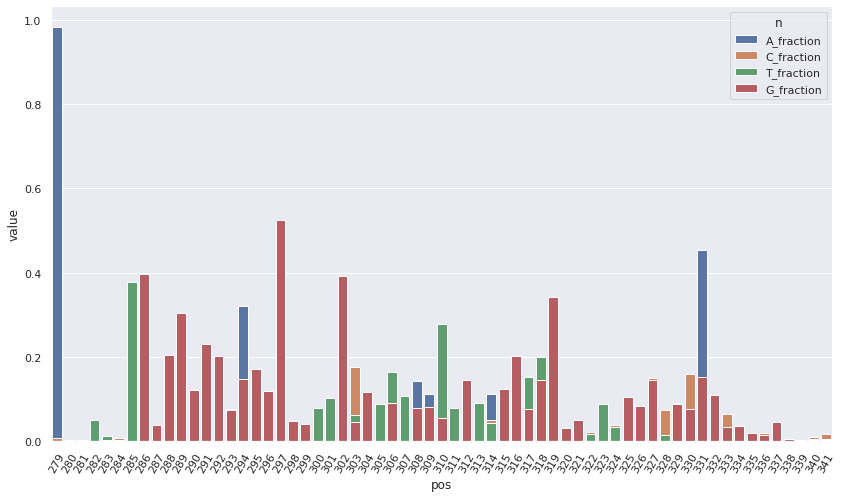

In [3]:
# 1. Draw stacked barplot by nucleotide frequency at each position

to_draw = reads[['A_fraction', 'C_fraction', 'T_fraction', 'G_fraction', 'pos']]
to_draw = pd.melt(to_draw, var_name='n', id_vars='pos', 
                  value_vars=['A_fraction', 'C_fraction', 'T_fraction', 'G_fraction'])
p = sns.barplot(data=to_draw, x='pos', y='value', hue='n', dodge=False)
p.set_xticklabels(p.get_xticklabels(), rotation=60);

In [4]:
# 2. Save in file subsample with rows, where matches is more, than mean and 
# columns are  pos, reads_all, mismatches, deletions, insertions

sub_reads = reads[['pos', 'reads_all', 'mismatches', 'deletions', 'insertions', 'matches']]
sub_reads = sub_reads[sub_reads['matches'] > sub_reads['matches'].mean()]
sub_reads.to_csv('train_part.csv', index=False)

## EDA Titanic dataset

In [5]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


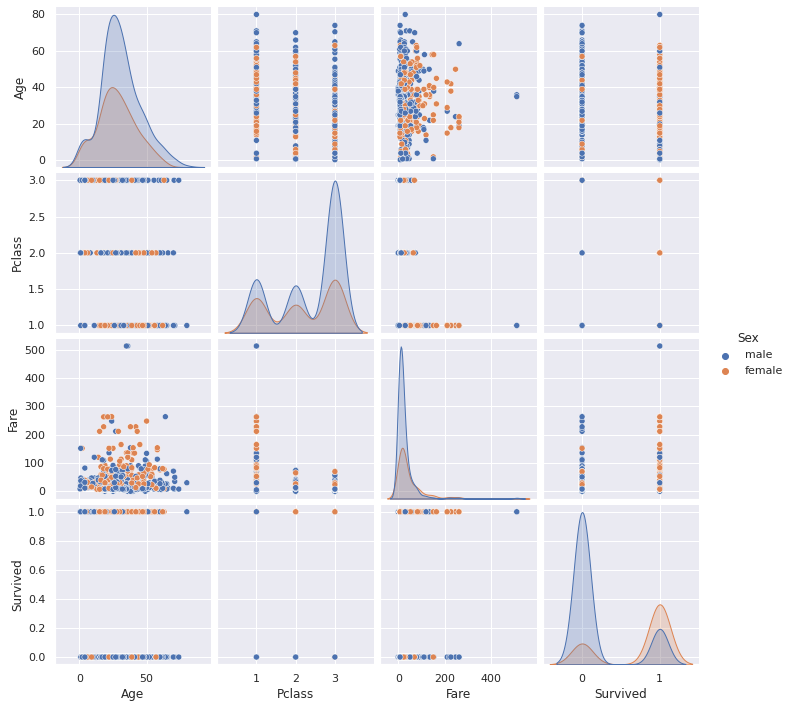

In [6]:
sns.pairplot(data[['Sex', 'Age', 'Pclass', 'Fare', 'Survived']], hue = 'Sex');

## Age, gender and wealth distribution on board

What are our points of interesting?
* Age distribution
* Cabin class distribution
* Class - Fare correlation (except outlier)
* Medium fare for ticket

In [7]:
data[['Pclass']] = pd.Categorical(data['Pclass'])
data[['Embarked']] = pd.Categorical(data['Embarked'])
data[['Survived']] = pd.Categorical(data['Survived'])


data['Pclass'] = data['Pclass'].cat.rename_categories({1: "First", 2: "Second", 3: "Third"})

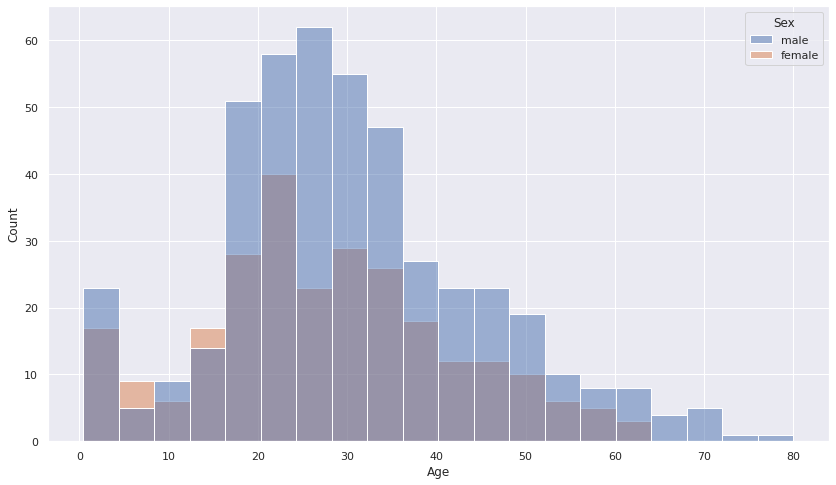

In [8]:
sns.histplot(data=data, x='Age', hue='Sex', bins=20);

In [9]:
data[['Sex', 'Age']].groupby('Sex').describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0

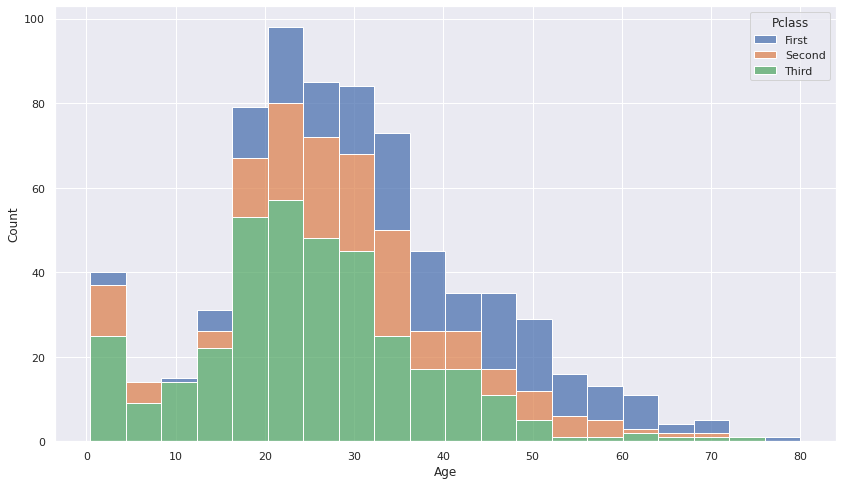

In [10]:
sns.histplot(data=data, x='Age', hue='Pclass', bins=20, multiple="stack");

In [11]:
data[['Age', 'Pclass']].groupby('Pclass').describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
First   186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
Second  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
Third   355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0

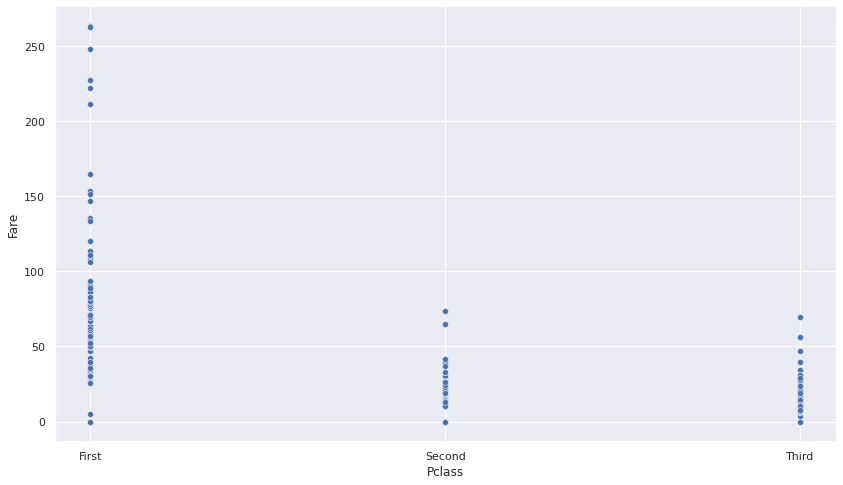

In [12]:
sns.scatterplot(data=data[data['Fare'] != max(data['Fare'])], x='Pclass', y='Fare');

In [13]:
data[data['Fare'] != max(data['Fare'])][['Fare', 'Pclass']].groupby('Pclass').describe()

Fare                                                              
        count       mean        std  min      25%      50%      75%     max
Pclass                                                                     
First   213.0  78.124061  59.996151  0.0  30.6958  57.9792  91.0792  263.00
Second  184.0  20.662183  13.417399  0.0  13.0000  14.2500  26.0000   73.50
Third   491.0  13.675550  11.778142  0.0   7.7500   8.0500  15.5000   69.55

#### What we know now:

* Most of passengers in range 20-35, third of passengers are women
* Young people was mostly at third class
* There is difference (perhaps, correlation) between Fare and class
* Median price for 3rd class is 8, 1st in 7 times greater - 58

## Disaster

What are our points of interesting?
* How many people survived
* What was age, sex and class distibution
* what were chances in every group

In [14]:
data[['Pclass', 'Sex', 'Age', 'Survived']].groupby(['Survived', 'Sex', 'Pclass']).describe()

Age                                            \
                        count       mean        std    min    25%   50%   
Survived Sex    Pclass                                                    
0        female First     3.0  25.666667  24.006943   2.00  13.50  25.0   
                Second    6.0  36.000000  12.915107  24.00  26.25  32.5   
                Third    55.0  23.818182  12.833465   2.00  15.25  22.0   
         male   First    61.0  44.581967  14.457749  18.00  33.00  45.5   
                Second   84.0  33.369048  12.158125  16.00  24.75  30.5   
                Third   215.0  27.255814  12.135707   1.00  20.00  25.0   
1        female First    82.0  34.939024  13.223014  14.00  23.25  35.0   
                Second   68.0  28.080882  12.764693   2.00  21.75  28.0   
                Third    47.0  19.329787  12.303246   0.75  13.50  19.0   
         male   First    40.0  36.248000  14.936744   0.92  27.00  36.0   
                Second   15.0  16.022000  19.547122   0.67   1.00   3.0   
                Third    38.0  22.274211  11.555786   0.42  16.50  25.0   

                                     
                          75%   max  
Survived Sex    Pclass               
0        female First   37.50  50.0  
                Second  42.50  57.0  
                Third   31.00  48.0  
         male   First   56.00  71.0  
                Second  39.00  70.0  
                Third   34.00  74.0  
1        female First   44.00  63.0  
                Second  35.25  55.0  
                Third   26.50  63.0  
         male   First   48.00  80.0  
                Second  31.50  62.0  
                Third   29.75  45.0

In [15]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

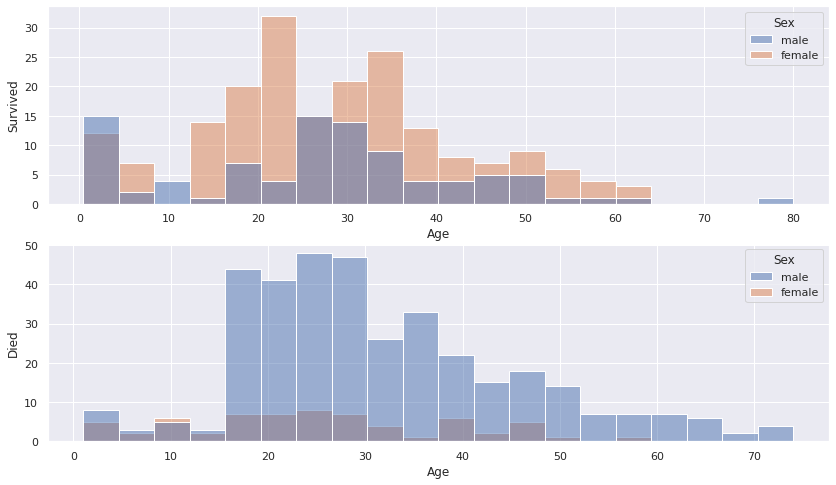

In [16]:
fig, axs = plt.pyplot.subplots(2)
p1 = sns.histplot(data=data[data.Survived == 1], x='Age', hue='Sex', 
                  hue_order= ['male', 'female'], bins=20, ax=axs[0])
p2 = sns.histplot(data=data[data.Survived == 0], x='Age', hue='Sex',
                  hue_order= ['male', 'female'], bins=20, ax=axs[1])
p1.set_ylabel('Survived');
p2.set_ylabel('Died');

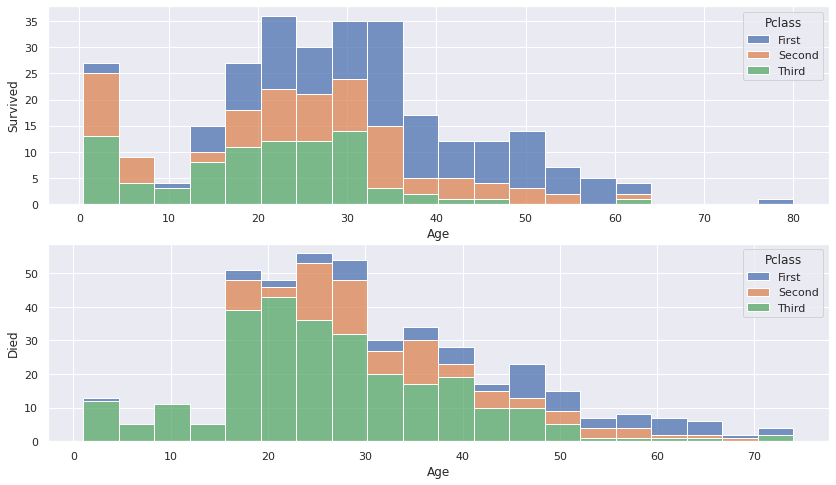

In [17]:
fig, axs = plt.pyplot.subplots(2)
p1 = sns.histplot(data=data[data.Survived == 1], x='Age', hue='Pclass', bins=20, multiple="stack", ax=axs[0])
p2 = sns.histplot(data=data[data.Survived == 0], x='Age', hue='Pclass', bins=20, multiple="stack", ax=axs[1])
p1.set_ylabel('Survived');
p2.set_ylabel('Died');

#### What we know now:

* Survived about third from all passengers (342), 549 died
* Most women and children (before 15) mostly was survived, elderly people (after 60) mostly died
* Most young people, who had died, was from third class
* First class was safe place, if you was before 45
* Second class, perhaps, wasn't an advantage
